In [ ]:
!pip uninstall pandas-profiling -y
!pip install ydata-profiling


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
import pandas._testing as tm

In [ ]:
df = pd.read_csv('/content/final_data.csv')

## 1. Data Profiling:

In [ ]:
df

Unnamed: 0  PassengerId  Survived  Pclass  \
0              0            1       0.0       3   
1              1            2       1.0       1   
2              2            3       1.0       3   
3              3            4       1.0       1   
4              4            5       0.0       3   
...          ...          ...       ...     ...   
1308        1308         1305       0.0       3   
1309        1309         1306       1.0       1   
1310        1310         1307       0.0       3   
1311        1311         1308       0.0       3   
1312        1312         1309       1.0       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1308                                 Spector, Mr. Woolf    male   NaN      0   
1309                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1310                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1311                                Ware, Mr. Frederick    male   NaN      0   
1312                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Embarked  
0         0           A/5 21171    7.2500        S  
1         0            PC 17599   71.2833        C  
2         0    STON/O2. 3101282    7.9250        S  
3         0              113803   53.1000        S  
4         0              373450    8.0500        S  
...     ...                 ...       ...      ...  
1308      0           A.5. 3236    8.0500        S  
1309      0            PC 17758  108.9000        C  
1310      0  SOTON/O.Q. 3101262    7.2500        S  
1311      0              359309    8.0500        S  
1312      1                2668   22.3583        C  

[1313 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1313 non-null   int64  
 1   PassengerId  1313 non-null   int64  
 2   Survived     1291 non-null   float64
 3   Pclass       1313 non-null   int64  
 4   Name         1313 non-null   object 
 5   Sex          1313 non-null   object 
 6   Age          1050 non-null   float64
 7   SibSp        1313 non-null   int64  
 8   Parch        1313 non-null   int64  
 9   Ticket       1313 non-null   object 
 10  Fare         1312 non-null   float64
 11  Embarked     1311 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 123.2+ KB


notes:

null values in cabin, age, embarked, ticket


In [ ]:
df.shape

(1313, 12)

In [ ]:
df.describe()

Unnamed: 0  PassengerId     Survived       Pclass         Age  \
count  1313.000000  1313.000000  1291.000000  1313.000000  1050.00000   
mean    656.000000   655.119573     0.379551     2.297030    29.89159   
std     379.174762   377.695897     0.485463     0.837461    14.39535   
min       0.000000     1.000000     0.000000     1.000000     0.17000   
25%     328.000000   328.000000     0.000000     2.000000    21.00000   
50%     656.000000   656.000000     0.000000     3.000000    28.00000   
75%     984.000000   981.000000     1.000000     3.000000    39.00000   
max    1312.000000  1309.000000     1.000000     3.000000    80.00000   

             SibSp        Parch         Fare  
count  1313.000000  1313.000000  1312.000000  
mean      0.497334     0.383854    33.217794  
std       1.040433     0.864500    51.698752  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     7.895800  
50%       0.000000     0.000000    14.454200  
75%       1.000000     0.000000    31.275000  
max       8.000000     9.000000   512.329200

In [ ]:
titanic = ProfileReport(df, title="Pandas Profiling Report on titanic dataset")
titanic

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 49.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data cleanning

First we drop columns that wont help in EDA process

In [ ]:
df.drop(['Ticket', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.shape

(1313, 10)

1-We remove null values in survived

2-In age column we have 263 missing cells so we will fill it in range between
18 and 41 why?

3-fare has 1 missing so we drop it

4- embarked has 2 missing so we drop it

In [ ]:
import numpy as np

In [ ]:
df['Age'] = df['Age'].fillna(np.random.randint(18,41))

In [ ]:
print(df.groupby('Sex')['Survived'].sum())

Sex
female    330.0
male      160.0
Name: Survived, dtype: float64


In [ ]:
df.dropna(subset=['Survived','Embarked', 'Fare'], inplace=True)

In [ ]:
df['SurvivalStatus'] = df['Survived'].map({1: 'Died', 0: 'Survived'})
df['Pclass'] = df['Pclass'].map({1: 'First Class', 2: 'Secound Class',3:'3rd Class'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1288 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1288 non-null   int64  
 1   Survived        1288 non-null   float64
 2   Pclass          1288 non-null   object 
 3   Name            1288 non-null   object 
 4   Sex             1288 non-null   object 
 5   Age             1288 non-null   float64
 6   SibSp           1288 non-null   int64  
 7   Parch           1288 non-null   int64  
 8   Fare            1288 non-null   float64
 9   Embarked        1288 non-null   object 
 10  SurvivalStatus  1288 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


## EDA

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'SurvivalStatus'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count of survived to Sex

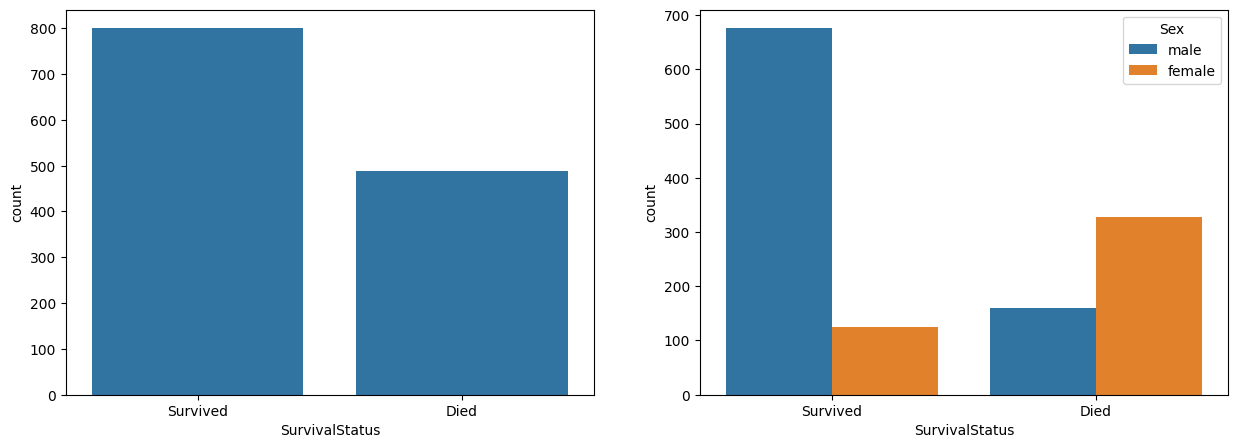

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='SurvivalStatus', data=df, ax=ax[0])
sns.countplot(x='SurvivalStatus', hue='Sex', data=df, ax=ax[1])
plt.show()

In [ ]:
pclass_counts

Pclass
3rd Class        713
First Class      323
Secound Class    277
Name: count, dtype: int64

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

pclass_counts = df['Pclass'].value_counts().sort_index()
fig = make_subplots(rows=1, cols=2, subplot_titles=["Passenger Count by Class", "Passenger Count by Class and Sex"])

fig.add_trace(
    go.Bar(x=pclass_counts.index.astype(str), y=pclass_counts.values, name="All"),
    row=1, col=1
)

pclass_sex_counts = df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
for sex in pclass_sex_counts['Sex'].unique():
    sub_df = pclass_sex_counts[pclass_sex_counts['Sex'] == sex]
    fig.add_trace(
        go.Bar(x=sub_df['Pclass'].astype(str), y=sub_df['count'], name=sex),
        row=1, col=2
    )

fig.update_layout(barmode='group', width=1000, height=500, showlegend=True)
fig.show()